# ANN Model Training -- Deep Learning

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Bhawna\Downloads\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
## split this dataset into independent and dependent features
x = df.iloc[:,3:13]
y = df.iloc[:,13]

In [4]:
## Feature engineering
geography = pd.get_dummies(x['Geography'], drop_first=True)
gender = pd.get_dummies(x['Gender'], drop_first=True)

In [5]:
geography = geography.astype('int')
gender = gender.astype('int')

In [6]:
x.drop(['Geography','Gender'], axis=1, inplace=True)

In [7]:
## Concat these all in one
x = pd.concat([x, geography, gender], axis=1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [8]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

In [9]:
## Feature scaling
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
xtrain = scalar.fit_transform(xtrain)
xtest = scalar.transform(xtest)

In [10]:
xtrain.shape

(8000, 11)

## Build ANN Model

In [11]:
from tensorflow.keras.models import Sequential    ## able to do forward and backword propogation
from tensorflow.keras.layers import Dense         ## able to create input, hidden and output layers   
from tensorflow.keras.layers import LeakyReLU, ReLU, PReLU, ELU   ## activation function
from tensorflow.keras.layers import Dropout                        ## Prevent Regularization

In [12]:
# Initialize the ANN
model = Sequential()

In [13]:
## Adding the input layer
model.add(Dense(units=11, activation='relu'))

In [14]:
## Adding the first hidden layer
model.add(Dense(units=7, activation='relu'))
## Adding the second hidden layer
model.add(Dense(units=6, activation='relu'))

In [15]:
## Adding the output layer
model.add(Dense(1, activation='sigmoid'))

In [16]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.03)
from tensorflow.keras.losses import BinaryCrossentropy

In [17]:
## Compile the model
model.compile(optimizer=opt, loss=BinaryCrossentropy, metrics=['accuracy'])

In [18]:
## Early stopping

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
    min_delta=0.001,
    patience=15,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False)

In [19]:
model_history = model.fit(xtrain, ytrain, validation_split=0.33, batch_size=10, epochs=50, callbacks=early_stop)

Epoch 1/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7971 - loss: 0.4530 - val_accuracy: 0.8247 - val_loss: 0.3979
Epoch 2/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8478 - loss: 0.3641 - val_accuracy: 0.8129 - val_loss: 0.4073
Epoch 3/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8346 - loss: 0.3850 - val_accuracy: 0.8413 - val_loss: 0.3816
Epoch 4/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8408 - loss: 0.3656 - val_accuracy: 0.8402 - val_loss: 0.3831
Epoch 5/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8579 - loss: 0.3598 - val_accuracy: 0.8413 - val_loss: 0.3948
Epoch 6/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8467 - loss: 0.3641 - val_accuracy: 0.8398 - val_loss: 0.3853
Epoch 7/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8413 - loss: 0.3736 - val_accuracy: 0.8444 - val_loss: 0.3971
Epoch 8/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8380 - loss: 0.3875 - val_accuracy: 0.

In [20]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

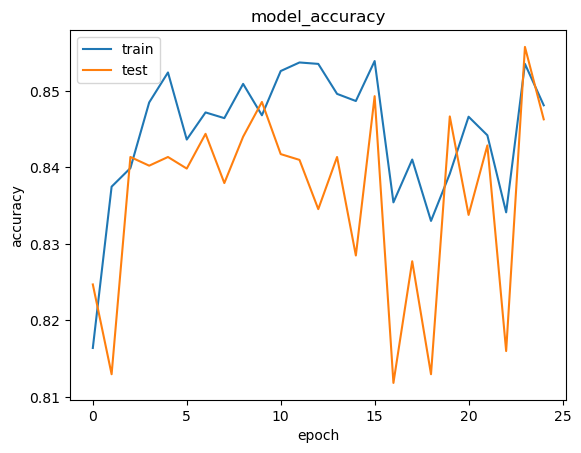

In [21]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.legend(['train','test'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

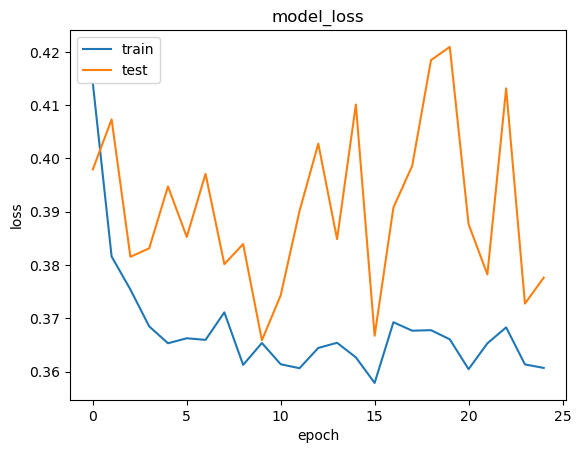

In [22]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.legend(['train','test'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [23]:
y_pred = model.predict(xtest)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [24]:
## Make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
cm

array([[1557,   38],
       [ 257,  148]], dtype=int64)

In [25]:
from sklearn.metrics import accuracy_score
score = accuracy_score(ytest, y_pred)
score

0.8525

In [26]:
## Get the weights
model.get_weights()

[array([[-0.7125688 ,  1.8679385 ,  1.167151  , -1.3586627 ,  0.47709003,
         -2.6704943 ,  0.33610472, -0.23553646, -0.64836836,  1.1933783 ,
         -0.3940724 ],
        [ 4.1293974 , -5.1150193 , -6.399566  ,  3.8590622 , -0.7576689 ,
          2.3535852 ,  0.04696429,  5.186811  ,  5.56359   , -2.4756107 ,
          0.18731241],
        [-0.64622104,  0.5349784 ,  0.04763331,  1.2804779 ,  0.6803298 ,
         -2.0148551 ,  2.8472981 , -0.7158557 , -0.28458405, -1.1659771 ,
          1.6618812 ],
        [-0.1729729 , -1.5128484 , -3.1627214 , -6.477638  , -1.5320754 ,
         -0.73235095, -2.2377079 ,  0.7113251 ,  0.6687919 ,  0.665431  ,
         -5.719416  ],
        [-2.9978445 , -0.5676245 , -2.2632573 , -8.431918  , -0.18802817,
         -3.929715  , -0.11194706, -1.8151741 ,  6.6444364 , -2.3795636 ,
         -2.2021081 ],
        [ 1.4930253 ,  1.3413802 ,  2.0558717 , -0.00995644, -0.6672516 ,
         -0.17251556,  1.4141626 ,  0.0549828 , -0.1468625 ,  0.1348593